In [1]:
# imports
import sys, os
sys.path.append("../../src")
from tqdm import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from surface import *
from source import *
from simulator import *
from focus import *
from terrain import *

GPU's detected. Enabling CUDA compute


In [2]:
# terrain extent
xmin, xmax = -11e3, 21e3
ymin, ymax =  3.9e3, 6.1e3

# facet into
fs   = 5
dims = (400, 400)

In [3]:
# make terrain object
terrain = Terrain(xmin, xmax, ymin, ymax, fs)
terrain.gen_flat(0)

In [4]:
# generate linspace of sources
ss = source_linspace('x', -10e3, 20e3, 5050, 25e3, 500, 9e6, 1e6)

In [5]:
# generate target locations
ts = [(x, 5050, -1000) for x in np.arange(0, 10000, 100)]   # targets

In [6]:
par = {
    'surf_gain':77,
    'rx_window_offset':22.5e3,
    'rx_window_m':10e3,
    'aspect':2
}

rdrgrms = []
for t in tqdm(ts, desc="Simulating terrain"):
    rdrgrm, time = run_sim_terrain(terrain, dims, ss, t, reflect=True, polarization='v', 
                                   sltrng=False, pt_response="gaussian", show=False, 
                                   par=par, nsmpl=1601, progress=False)
    rdrgrms.append(rdrgrm)

Simulating terrain: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [46:02<00:00, 27.63s/it]


In [7]:
combined = np.zeros_like(rdrgrms[0])
for rdr in rdrgrms:
    combined += rdr

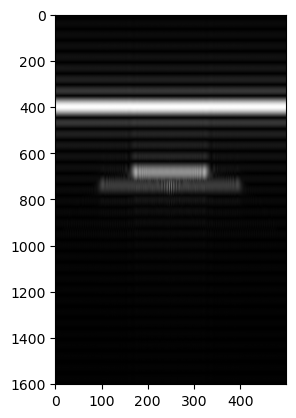

In [8]:
plt.imshow(np.abs(combined), cmap="grey", aspect=0.5)
plt.show()